# Plotting brain parcellations

## Load libraries

In [1]:
from nilearn import datasets
from nilearn import plotting
import numpy as np

## Plot brain atlas from Nifti file


Dataset created in F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data\fsl



Downloaded 25526272 of 25716861 bytes (99.3%,    0.1s remaining) ...done. (10 seconds, 0 min)
Extracting data from F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data\fsl\3d1b1ab2f8482efeb836414d829dc205\HarvardOxford.tgz..... done.


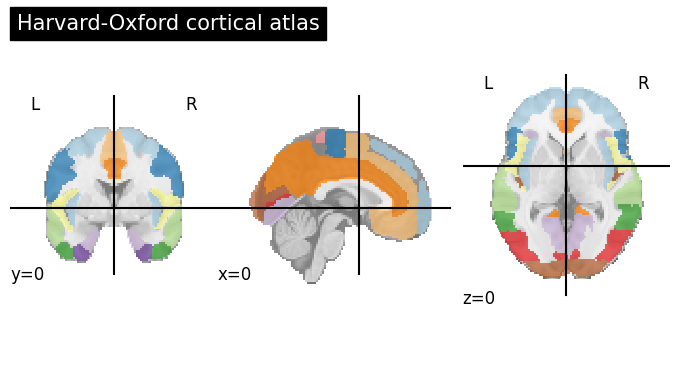

In [2]:
# Load atlas
data_path = r"F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data"

ho_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm', data_dir=data_path)
ho_maps = ho_atlas.maps

# Plot atlas using plot_ROI funtion
from nilearn import plotting

# 直接可视化整个 atlas
# plot_roi 会自动用 MNI152 2 mm T1 模板 作为背景
plotting.plot_roi(
    ho_maps,
    title='Harvard-Oxford cortical atlas',
    display_mode='ortho',  # 也可以改成 'x', 'y', 'z', 'xz', 'lyrz' 等
    cut_coords=(0, 0, 0),  # 切片坐标中心
    cmap='Paired'          # 配色
)

plotting.show()


In [3]:
print(type(ho_atlas))         # <class 'sklearn.utils.Bunch'>
print(ho_atlas.keys())        # dict-like keys: ['maps', 'labels']

print(ho_atlas.maps)          # atlas 的 NIfTI 图像路径
print(ho_atlas.labels[:10])   # 前 10 个脑区名称

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['filename', 'maps', 'labels', 'description'])

<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine:
[[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
de

### Excercise

Select one of atlases from [Nilearn database](https://nilearn.github.io/modules/reference.html#module-nilearn.datasets), and plot it on the brain.

Atlas file path: 
<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine:
[[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_cod

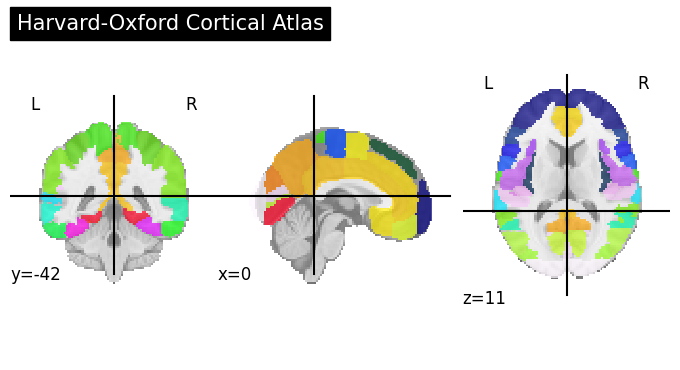

In [4]:
from nilearn import datasets, plotting

# 1️⃣ 选择一个 atlas，例如 Harvard-Oxford cortical atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# atlas 是个 Bunch，有 'maps' 和 'labels'
print("Atlas file path:", atlas.maps)
print("Number of regions:", len(atlas.labels))

# 2️⃣ 用 nilearn.plotting.plot_roi 在大脑模板上画出来
# plot_roi 会自动用 MNI152 2 mm T1 模板 作为背景
plotting.plot_roi(atlas.maps,
                  title='Harvard-Oxford Cortical Atlas',
                  display_mode='ortho')  # ortho = 显示三个切面

plotting.show()

## Plot brain atlas created based on MNI coordinates

In [6]:
# Load atlas
import os
os.environ['NILEARN_DATA'] = r'F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data'

power = datasets.fetch_coords_power_2011()

# Select coordinates
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

# Print coordinates
print(coords[:5])

[[-25 -98 -12]
 [ 27 -97 -13]
 [ 24  32 -18]
 [-56 -45 -24]
 [  8  41 -24]]


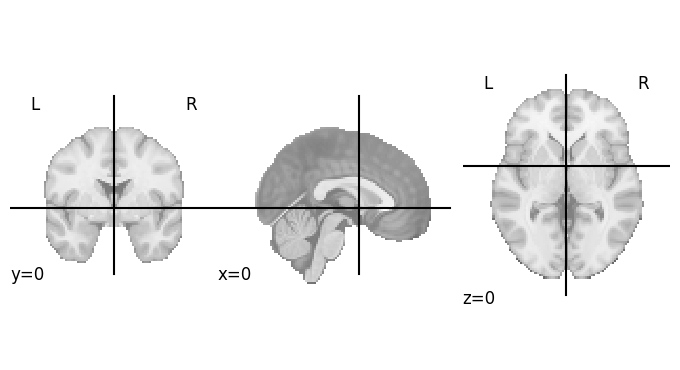

In [10]:
# Plot coordinates on brain slices using plot_roi function & .add_markers method
display = plotting.plot_roi(None)

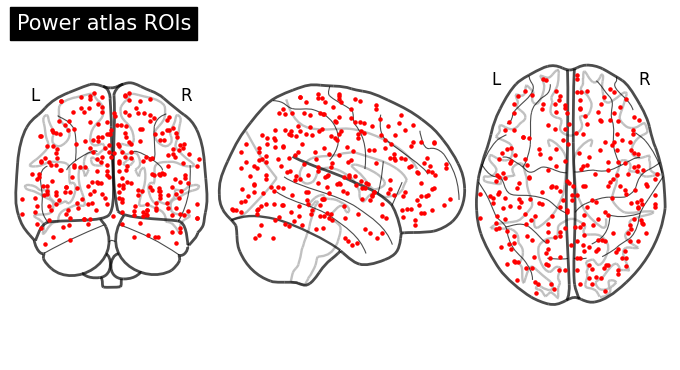

In [11]:
# 打开一个空的玻璃脑（glass brain）
display = plotting.plot_glass_brain(None, title='Power atlas ROIs')

# 在玻璃脑上标注坐标点
display.add_markers(coords, marker_size=5, marker_color='red')

plotting.show()

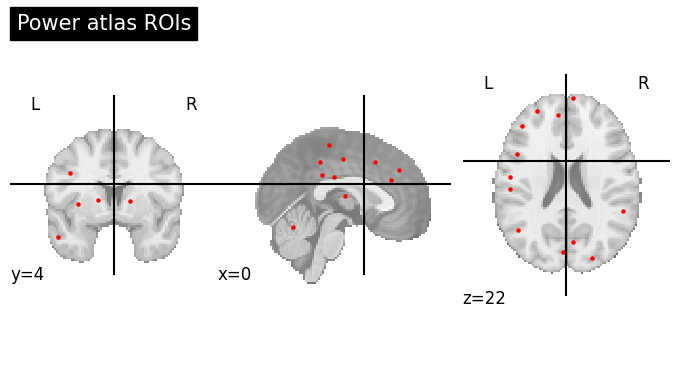

In [12]:
#plot_anat() 会加载 MNI152 2mm 模板（nilearn 内置的标准解剖大脑）

#如果你没有指定 cut_coords 参数，它会自动选 三个正交切片（sagittal、coronal、axial）
#来显示大脑的中间部分

#.add_markers() 会把你提供的 coords 在这些切片上画出来

#所以实际上你看到的切片是 自动选择的中间 sagittal/coronal/axial 切片，并不是你指定的某个固定平面。
display = plotting.plot_anat(title='Power atlas ROIs')  # 画解剖模板
#指定三个切片的 MNI 坐标
#display = plotting.plot_anat(title='Power atlas ROIs', cut_coords=(0, -52, 18))
display.add_markers(coords, marker_size=5, marker_color='red')
plotting.show()

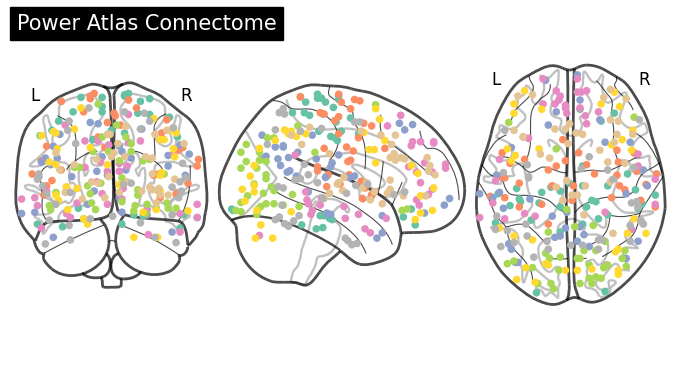

In [13]:
# Plot on glass brain using plot_connectome
n_rois = len(coords)
connectivity_matrix = np.zeros((n_rois, n_rois))

# Plot using plot_connectome function
# 使用 plot_connectome 画玻璃脑
plotting.plot_connectome(
    connectivity_matrix,
    coords,
    title='Power Atlas Connectome',
    edge_threshold="80%",  # 只画最强的 20% 连线
    node_size=20           # 节点大小
)
# connectivity_matrix：每个 ROI 之间的连接强度矩阵。这里用零矩阵只是占
# 如果有实际的时间序列相关性，可以用它替换；

plotting.show()